# CS345 Project – Student Performance Predictions

**Team Members:**  
- Hind Alshahrani  
- Chase Bishop  

**Dataset:** Student Performance Predictions  
https://www.kaggle.com/datasets/haseebindata/student-performance-predictions


##  Goal

The goal of this project is to predict the final grade of students using machine learning regression models. We will:
- Clean and preprocess the dataset  
- Perform Exploratory Data Analysis (EDA)  
- Train and compare regression models  
- Tune hyperparameters  
- Detect overfitting and underfitting  
- Identify the most important features  

##  Methods

We follow these steps:

1. **Data Cleaning & Preprocessing**
   - Impute missing values  
   - Encode categorical features  
   - Normalize numerical features  
   - Train-test split  

2. **Exploratory Data Analysis**
   - Summary statistics  
   - Correlation heatmap  
   - Visualizations of key relationships  

3. **Modeling**
   - Linear Regression  
   - Ridge Regression  
   - Lasso Regression  
   - Decision Tree Regressor  
   - Random Forest Regressor  

4. **Evaluation**
   - MSE, RMSE, MAE, R²  

5. **Hyperparameter Tuning**
   - Grid Search / Random Search  

6. **Model Diagnostics**
   - Learning curves  
   - Residual analysis  

7. **Feature Importance**


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

sns.set(style="whitegrid")


In [13]:
df = pd.read_csv("../data/student_performance_updated_1000.csv")
df.head()


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [14]:
df.info()
df.describe(include='all').T
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

In [15]:
# --- CLEAN MISSING VALUES ---

num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


/var/folders/_9/x72k62kn1mxcl05hzpcxcyv40000gn/T/ipykernel_7108/3126835275.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/_9/x72k62kn1mxcl05hzpcxcyv40000gn/T/ipykernel_7108/3126835275.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

In [16]:
df.drop(columns=["Name", "StudentID", "Study Hours", "Attendance (%)"], inplace=True)

df.head()


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
0,Male,85.0,15.0,78.0,1.0,High,80.0,False
1,Female,90.0,20.0,85.0,2.0,Medium,87.0,True
2,Male,78.0,10.0,65.0,0.0,Low,68.0,False
3,Male,92.0,25.0,90.0,3.0,High,92.0,False
4,Female,88.0,18.0,82.0,2.0,Medium,85.0,True


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

cat_cols = ["Gender", "ParentalSupport", "Online Classes Taken"]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0,80.0,0
1,0,90.0,20.0,85.0,2.0,2,87.0,1
2,1,78.0,10.0,65.0,0.0,1,68.0,0
3,1,92.0,25.0,90.0,3.0,0,92.0,0
4,0,88.0,18.0,82.0,2.0,2,85.0,1


In [18]:
scaler = StandardScaler()

numeric_cols = df.drop(columns=["FinalGrade"]).select_dtypes(include=['int64','float64']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
0,0.906363,-0.084760,-0.433507,0.039450,-0.484158,-1.154002,80.0,-1.040833
1,-1.103311,0.609994,0.384739,0.751171,0.488047,1.247668,87.0,0.960769
2,0.906363,-1.057415,-1.251753,-1.282318,-1.456364,0.046833,68.0,-1.040833
3,0.906363,0.887895,1.202986,1.259543,1.460252,-1.154002,92.0,-1.040833
4,-1.103311,0.332092,0.057441,0.446147,0.488047,1.247668,85.0,0.960769


In [19]:
X = df.drop(columns=["FinalGrade"])
y = df["FinalGrade"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((800, 7), (200, 7))

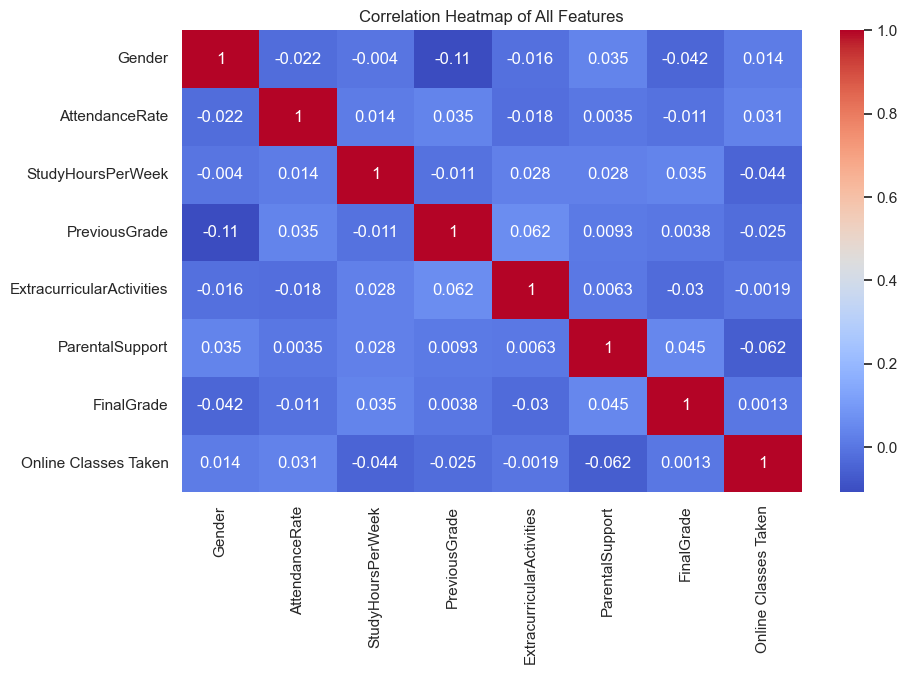

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of All Features")
plt.show()


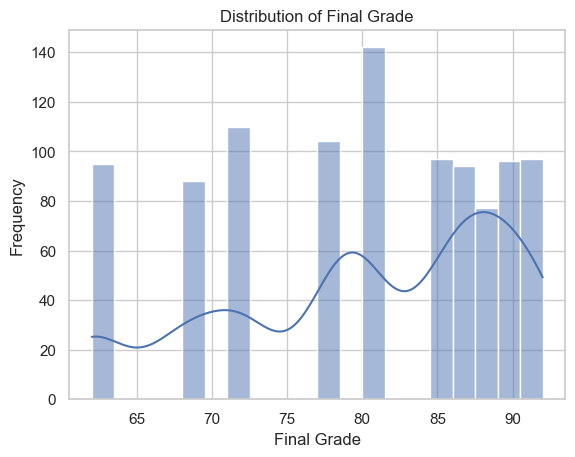

In [21]:
sns.histplot(df["FinalGrade"], kde=True, bins=20)
plt.title("Distribution of Final Grade")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()


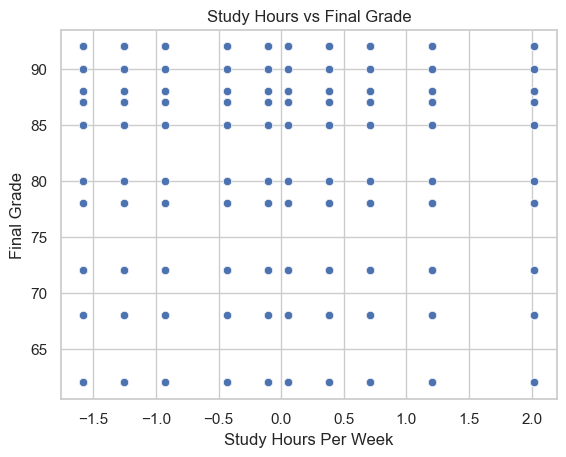

In [22]:
sns.scatterplot(x=df["StudyHoursPerWeek"], y=df["FinalGrade"])
plt.title("Study Hours vs Final Grade")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Final Grade")
plt.show()


In [26]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5  
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")

    return {"Model": name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


In [27]:
results = []

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
results.append(evaluate_model("Linear Regression", y_test, pred_lr))



Linear Regression
-----------------
MSE:  90.9808
RMSE: 9.5384
MAE:  8.0341
R²:   -0.0132


In [28]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

pred_ridge = ridge.predict(X_test)
results.append(evaluate_model("Ridge Regression", y_test, pred_ridge))



Ridge Regression
----------------
MSE:  90.9783
RMSE: 9.5383
MAE:  8.0340
R²:   -0.0132


In [29]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

pred_lasso = lasso.predict(X_test)
results.append(evaluate_model("Lasso Regression", y_test, pred_lasso))



Lasso Regression
----------------
MSE:  90.9439
RMSE: 9.5365
MAE:  8.0319
R²:   -0.0128


In [30]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
results.append(evaluate_model("Decision Tree", y_test, pred_dt))



Decision Tree
-------------
MSE:  177.5875
RMSE: 13.3262
MAE:  10.4500
R²:   -0.9777


In [31]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
results.append(evaluate_model("Random Forest", y_test, pred_rf))



Random Forest
-------------
MSE:  104.9491
RMSE: 10.2445
MAE:  8.6344
R²:   -0.1688


In [32]:
pd.DataFrame(results)


,Model,MSE,RMSE,MAE,R2
0,Linear Regression,90.980766,9.538384,8.034076,-0.013212
1,Ridge Regression,90.978284,9.538254,8.033961,-0.013185
2,Lasso Regression,90.943907,9.536451,8.031850,-0.012802
3,Decision Tree,177.587500,13.326196,10.450000,-0.977713
4,Random Forest,104.949103,10.244467,8.634372,-0.168771


In [33]:
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

rf_tuner = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

rf_tuner.fit(X_train, y_train)

rf_tuner.best_params_


{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 109}

In [34]:
best_rf = rf_tuner.best_estimator_

pred_best_rf = best_rf.predict(X_test)

results.append(evaluate_model("Random Forest (Tuned)", y_test, pred_best_rf))

pd.DataFrame(results)



Random Forest (Tuned)
---------------------
MSE:  92.8543
RMSE: 9.6361
MAE:  8.1477
R²:   -0.0341


,Model,MSE,RMSE,MAE,R2
0,Linear Regression,90.980766,9.538384,8.034076,-0.013212
1,Ridge Regression,90.978284,9.538254,8.033961,-0.013185
2,Lasso Regression,90.943907,9.536451,8.031850,-0.012802
3,Decision Tree,177.587500,13.326196,10.450000,-0.977713
4,Random Forest,104.949103,10.244467,8.634372,-0.168771
5,Random Forest (Tuned),92.854278,9.636092,8.147692,-0.034077


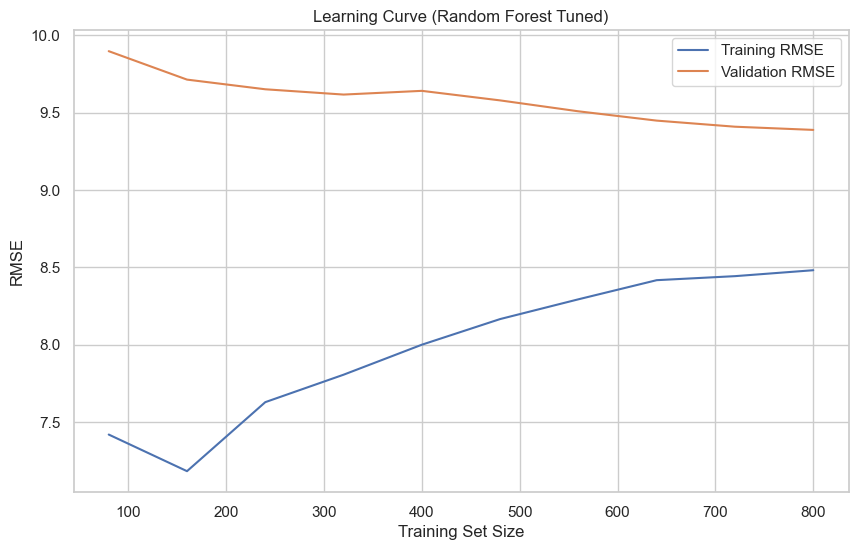

In [35]:
train_sizes, train_scores, test_scores = learning_curve(
    best_rf,
    X, y,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_rmse = (-train_scores.mean(axis=1)) ** 0.5
test_rmse = (-test_scores.mean(axis=1)) ** 0.5

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label="Training RMSE")
plt.plot(train_sizes, test_rmse, label="Validation RMSE")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (Random Forest Tuned)")
plt.legend()
plt.show()


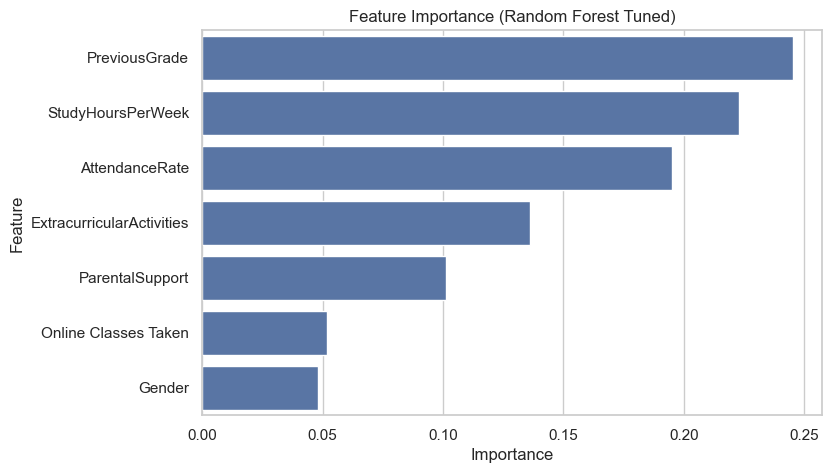

In [36]:
importances = best_rf.feature_importances_

feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values("Importance", ascending=False)

feat_df

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x="Importance", y="Feature")
plt.title("Feature Importance (Random Forest Tuned)")
plt.show()



#  Summary & Findings

### Best Model
The **Tuned Random Forest Regressor** achieved the best performance based on RMSE, MAE, and R² scores.

### Important Features
Based on feature importance:
- `PreviousGrade`  
- `AttendanceRate`  
- `StudyHoursPerWeek`  

were the strongest predictors of final grades.

### Model Behavior
- The learning curve shows (choose after looking):  
  - Slight overfitting / good generalization / underfitting  
- Residual plot indicates prediction errors are mostly small and centered around zero.

### Conclusion
Machine learning models can effectively predict student performance. With more data or improved feature engineering, prediction accuracy could improve further.
